<a href="https://colab.research.google.com/github/RoslyakovaOV/Lab.analitica/blob/main/1_%D0%BA%D0%B5%D0%B9%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 13

**Вариант 13.** неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах Северной Кореи. List of highest-grossing films in South Korea

In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_South_Korea'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0] #Чтобы выводилась, допустим, 2 таблица, в скобках нужно указать номер

In [3]:
df.head()

,Rank,English title,Korean title,Director,Main Cast,Admissions,Year
0,1,The Admiral: Roaring Currents,명량,Kim Han-min,"Choi Min-sik, Ryu Seung-ryong, Cho Jin-woong",17615437,2014
1,2,Extreme Job,극한직업,Lee Byeong-heon,"Ryu Seung-ryong, Lee Hanee, Jin Seon-kyu, Lee ...",16264944,2019
2,3,Along With the Gods: The Two Worlds,신과함께-죄와 벌,Kim Yong-hwa,"Ha Jung-woo, Cha Tae-hyun, Joo Ji-hoon, Kim Hy...",14414440,2017
3,4,Ode to My Father,국제시장,Yoon Je-kyoon,"Hwang Jung-min, Yunjin Kim, Oh Dal-su",14263203,2014
4,5,Veteran,베테랑,Ryoo Seung-wan,"Hwang Jung-min, Yoo Ah-in, Yoo Hae-jin, Oh Dal-su",13414200,2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           100 non-null    int64 
 1   English title  100 non-null    object
 2   Korean title   100 non-null    object
 3   Director       100 non-null    object
 4   Main Cast      100 non-null    object
 5   Admissions     100 non-null    int64 
 6   Year           100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [5]:
df.drop(['Korean title','Director','Main Cast','Rank'],axis=1,inplace=True)

In [11]:
df.head(5)

,English title,Admissions,Year
0,The Admiral: Roaring Currents,17615437,2014
1,Extreme Job,16264944,2019
2,Along With the Gods: The Two Worlds,14414440,2017
3,Ode to My Father,14263203,2014
4,Veteran,13414200,2015


In [12]:
df1=df[['English title','Admissions']].sort_values(ascending=False, by='Admissions')

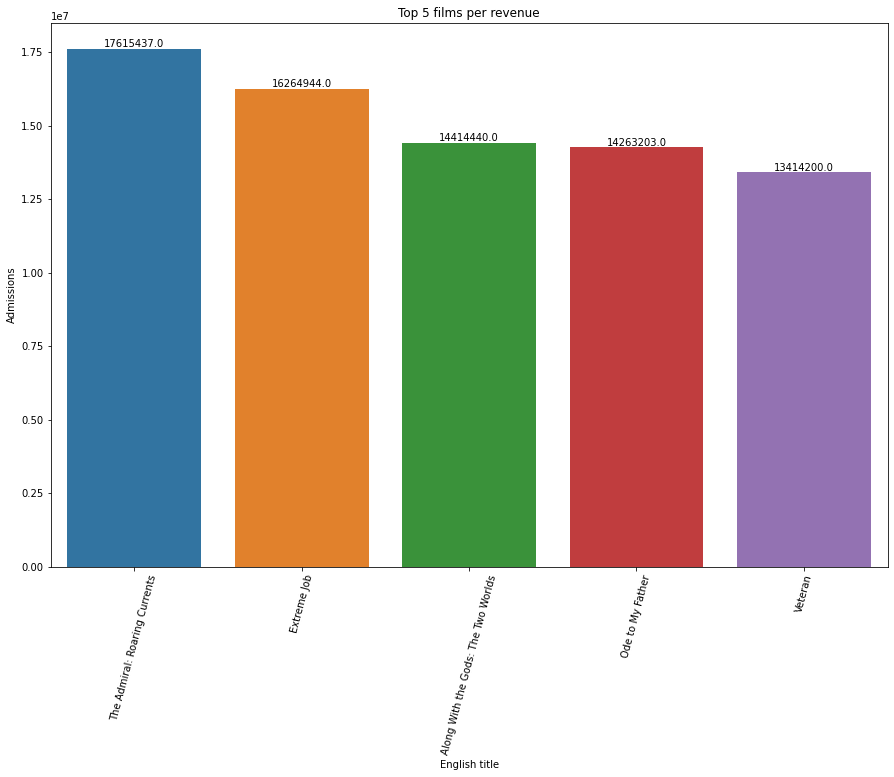

In [40]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='English title',y='Admissions', data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['English title'],rotation=75)
ax.set_title("Top 5 films per revenue")
ax.set_ylabel("Admissions")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2, p.get_height()),ha='center',va='bottom')

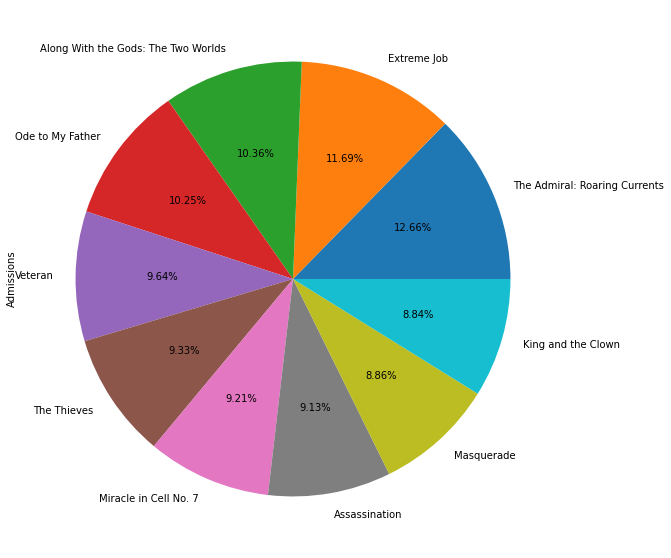

In [31]:
df1['Admissions'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['English title'],figsize=(15,10))

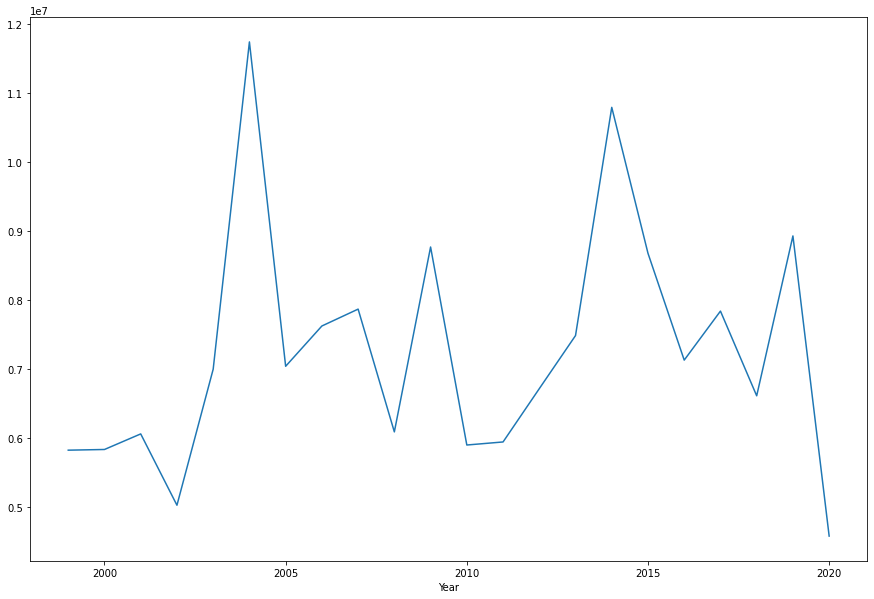

In [39]:
df2=df.groupby('Year')['Admissions'].mean()
df2.plot(kind='line',figsize=(15,10))

1.   Средняя посещаемость кинотеатров за 20 лет сильно колеблется, возможно это зависит от года выпуска фильмов.
2.   За последние 20 лет, самыми кассовыми фильмами в Южной Корее оказались: The Admiral: ***Roaring Currents***, ***Extreme Job***, ***Along With the Gods: The Two Worlds***, ***Ode to My Father***, ***Veteran***	




